In [1]:
import numpy as np
from datascience import *
%matplotlib inline

---

- ### np.random.choice(array, size=None, replace=True)
    - #### size: 출력 배열의 shape
    - #### replace: 중복 허용 여부

<br>

- #### 동전 100번 던졌을 때 앞면이 나오는 횟수 시뮬레이션

In [10]:
coin = make_array("head", "tail")
outcomes = np.random.choice(coin, 100)
print(outcomes)
np.count_nonzero(outcomes=="head")

['head' 'head' 'head' 'tail' 'head' 'tail' 'head' 'tail' 'tail' 'head'
 'tail' 'head' 'tail' 'tail' 'head' 'tail' 'tail' 'tail' 'tail' 'tail'
 'head' 'head' 'tail' 'head' 'head' 'head' 'tail' 'head' 'head' 'head'
 'head' 'head' 'tail' 'tail' 'tail' 'head' 'tail' 'head' 'head' 'tail'
 'tail' 'head' 'head' 'head' 'tail' 'head' 'head' 'head' 'head' 'head'
 'head' 'head' 'tail' 'tail' 'tail' 'head' 'head' 'head' 'head' 'tail'
 'head' 'head' 'head' 'tail' 'head' 'head' 'tail' 'head' 'head' 'tail'
 'head' 'tail' 'head' 'head' 'tail' 'tail' 'tail' 'tail' 'head' 'head'
 'tail' 'head' 'head' 'head' 'tail' 'head' 'head' 'head' 'tail' 'head'
 'head' 'tail' 'tail' 'head' 'tail' 'head' 'head' 'tail' 'tail' 'head']


59

- #### 동전을 100회 던지는 작업을 20000번 반복하여 결과값 테이블에 저장

In [18]:
def one_simulated_value():
    coins = make_array("head", "tail")
    return np.count_nonzero(np.random.choice(coins, 100) == "head")

result_arr = make_array()
for rep in range(1, 20001):
    result_arr = np.append(result_arr, one_simulated_value())

table = Table().with_columns(
    "Repetition", np.arange(1, 20001),
    "Number of Heads", result_arr
)
table

Repetition,Number of Heads
1,49
2,54
3,52
4,47
5,44
6,51
7,58
8,50
9,46
10,57


- #### 너비 1인 히스토그램 생성

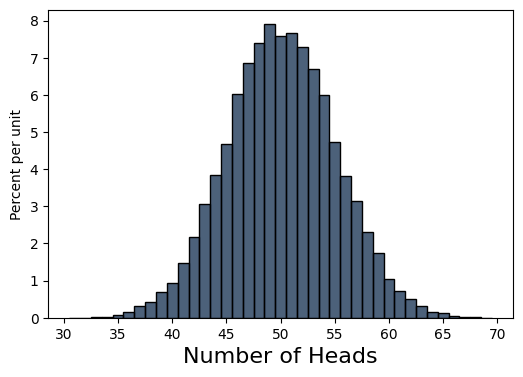

In [20]:
table.hist("Number of Heads", bins=np.arange(30.5, 69.6, 1))

---

- ## Monopoly 게임
    - #### 주사위 두 번 굴렸을때의 합 분석

<br>

In [23]:
dice = np.arange(1, 7, 1)

def one_simulated_value():
    return np.random.choice(dice, 1) + np.random.choice(dice, 1)

arr = make_array()
for _ in range(10000):
    arr = np.append(arr, one_simulated_value())

table = Table().with_columns(
    "Try", np.arange(1, 10001, 1),
    "Result", arr
)
table

Try,Result
1,4
2,8
3,4
4,6
5,10
6,4
7,7
8,7
9,8
10,4


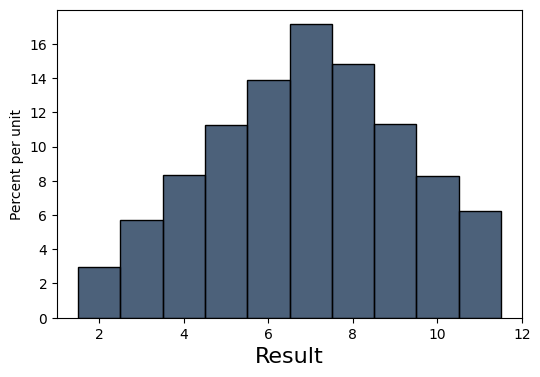

In [25]:
table.hist("Result", bins=np.arange(1.5, 12.5, 1))

---

- ## The Monty Hall Problem
    - #### 1. 세 개의 닫힌 문 중 참가자가 한 개의 문 선택
    - #### 2. 참가자가 선택하지 않은 문 중 염소인 문을 진행자가 열어서 보여줌
    - #### 3. 다른 문으로 선택을 바꾸는 것이 이득이다.  
        - #### 참가자가 처음 선택했을 때 자동차를 선택할 확률: $\frac{1}{3}$
        - #### 진행자가 염소인 문을 공개한 후 참가자가 선택을 바꿨을 때 자동차를 선택할 확률
            - #### 내가 선택하지 않은 문에 자동차가 있을 확률: $\frac{2}{3}$

<br>

- #### 시뮬레이션

In [34]:
goats = make_array("first goat", "second goat")

def other_goat(goat):
    if goat == "first goat":
        return "second goat"
    elif goat == "second goat":
        return "first goat"

behind_doors = np.append(goats, "car")

def monty_hall_game():
    contestant_guess = np.random.choice(behind_doors)

    if contestant_guess == "first goat":
        return ["first goat", "second goat", "car"]
    elif contestant_guess == "second goat":
        return ["second goat", "first goat", "car"] 
    elif contestant_guess == "car":
        revealed = np.random.choice(goats)
        return ["car", revealed, other_goat(revealed)]

In [36]:
result = make_array()

table = Table(["Guess", "Revealed", "Remaining"])
for _ in range(10000):
    table.append(monty_hall_game())
table

Guess,Revealed,Remaining
second goat,first goat,car
second goat,first goat,car
second goat,first goat,car
first goat,second goat,car
first goat,second goat,car
first goat,second goat,car
first goat,second goat,car
second goat,first goat,car
first goat,second goat,car
car,first goat,second goat


- #### 참가자의 추측의 결과와, 남은 문의 결과를 포함한 테이블 생성

In [39]:
guess_table = table.group("Guess")
guess_table

Guess,count
car,3326
first goat,3406
second goat,3268


In [41]:
remaining_table = table.group("Remaining")
remaining_table

Remaining,count
car,6674
first goat,1649
second goat,1677


- #### 두 테이블을 합친 테이블 생성

In [45]:
joined_table = guess_table.join("Guess", remaining_table, "Remaining").relabeled(1, "Original Door").relabeled(2, "Remaining Door")
joined_table

Guess,Original Door,Remaining Door
car,3326,6674
first goat,3406,1649
second goat,3268,1677


- #### 두 결과를 시각화
    - #### 파란색 막대
        - #### 처음 선택에 대한 결과는 $\frac{1}{3}$으로 모두 동일
    - #### 노란색 막대
        - #### 남은 문이 자동차일 확률은 $\frac{2}{3}$임

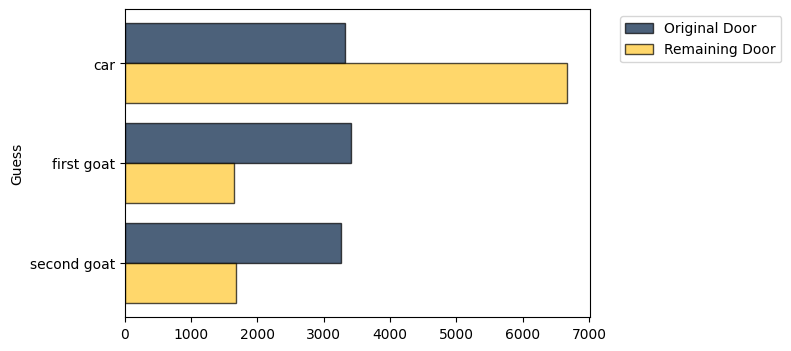

In [46]:
joined_table.barh("Guess", make_array("Original Door", "Remaining Door"))